HPCA(WT) vs. HPCA(N75K)
=======================
Multiople or long stimulations

In [1]:
import numpy as np
from numpy import ma
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from skimage.util import montage
from skimage.filters import rank
from skimage import morphology
from skimage import exposure
from skimage import measure
from skimage import filters
from skimage import io

from scipy import ndimage as ndi
from scipy import signal
from scipy import stats

from domb.reg_type import wf_x2_m2 as wf
from domb.fret.e_fret.e_app import Eapp
from domb.red_green import wt_vs_mut_multistim
from domb.utils import plot
from domb.utils.plot import CMaps
from domb.utils import masking

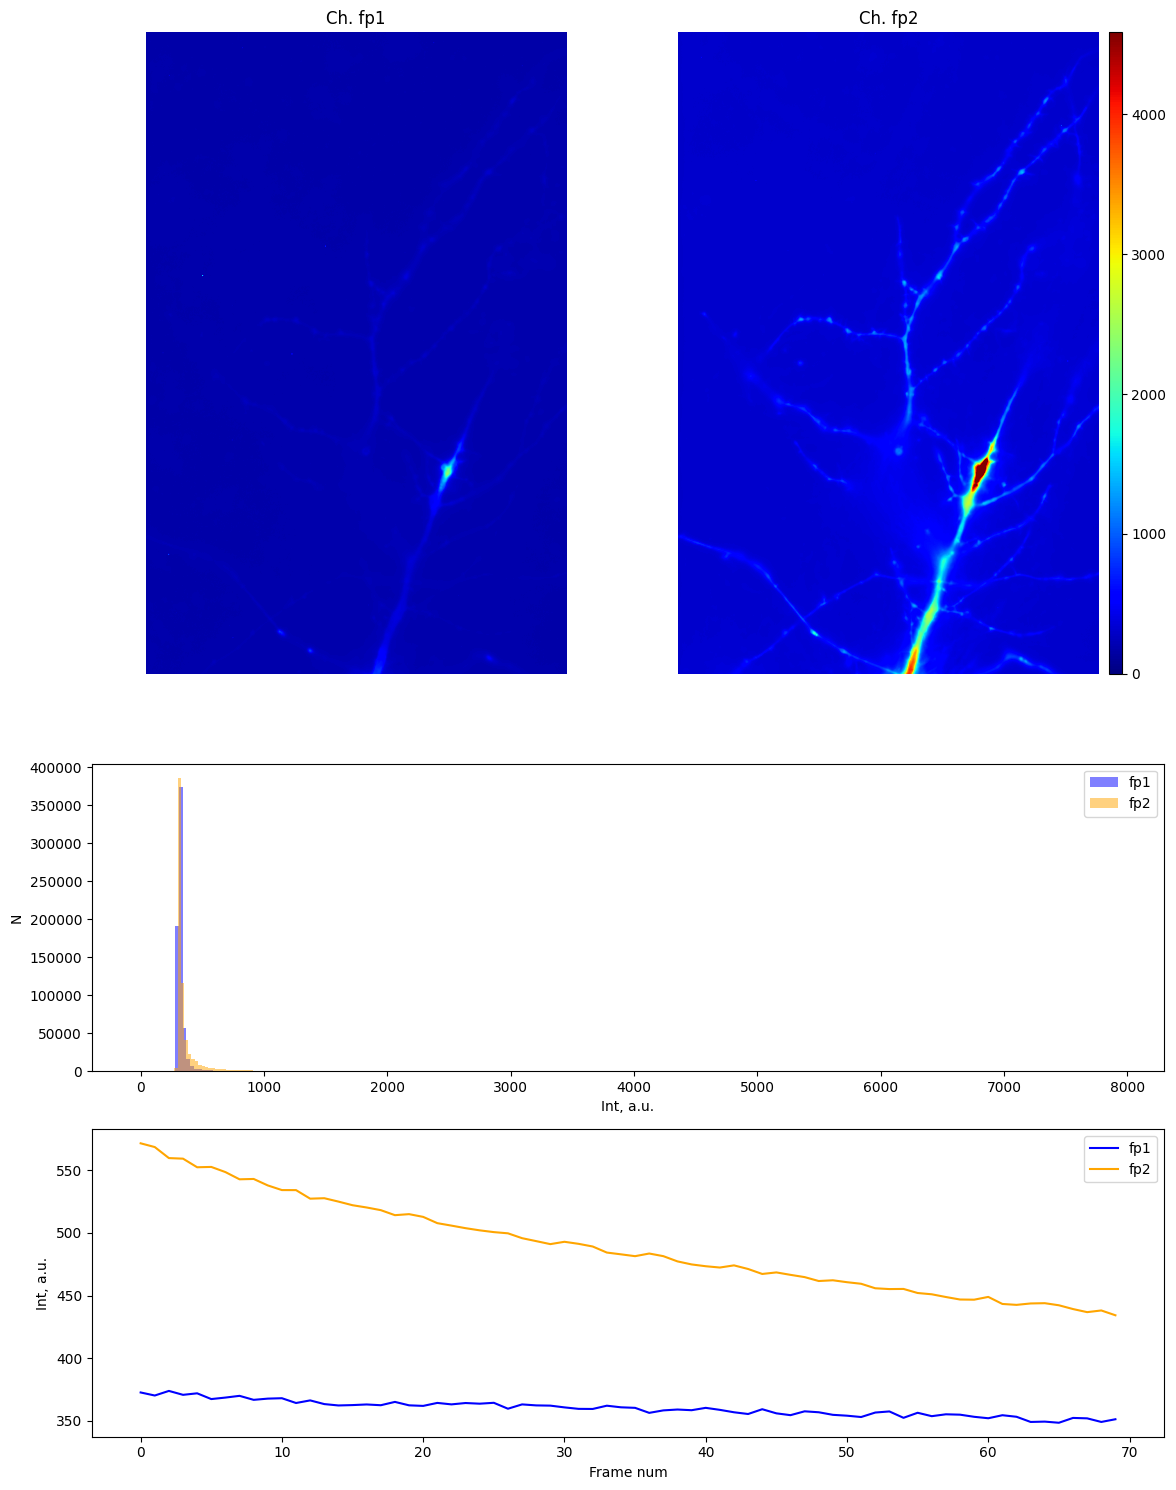

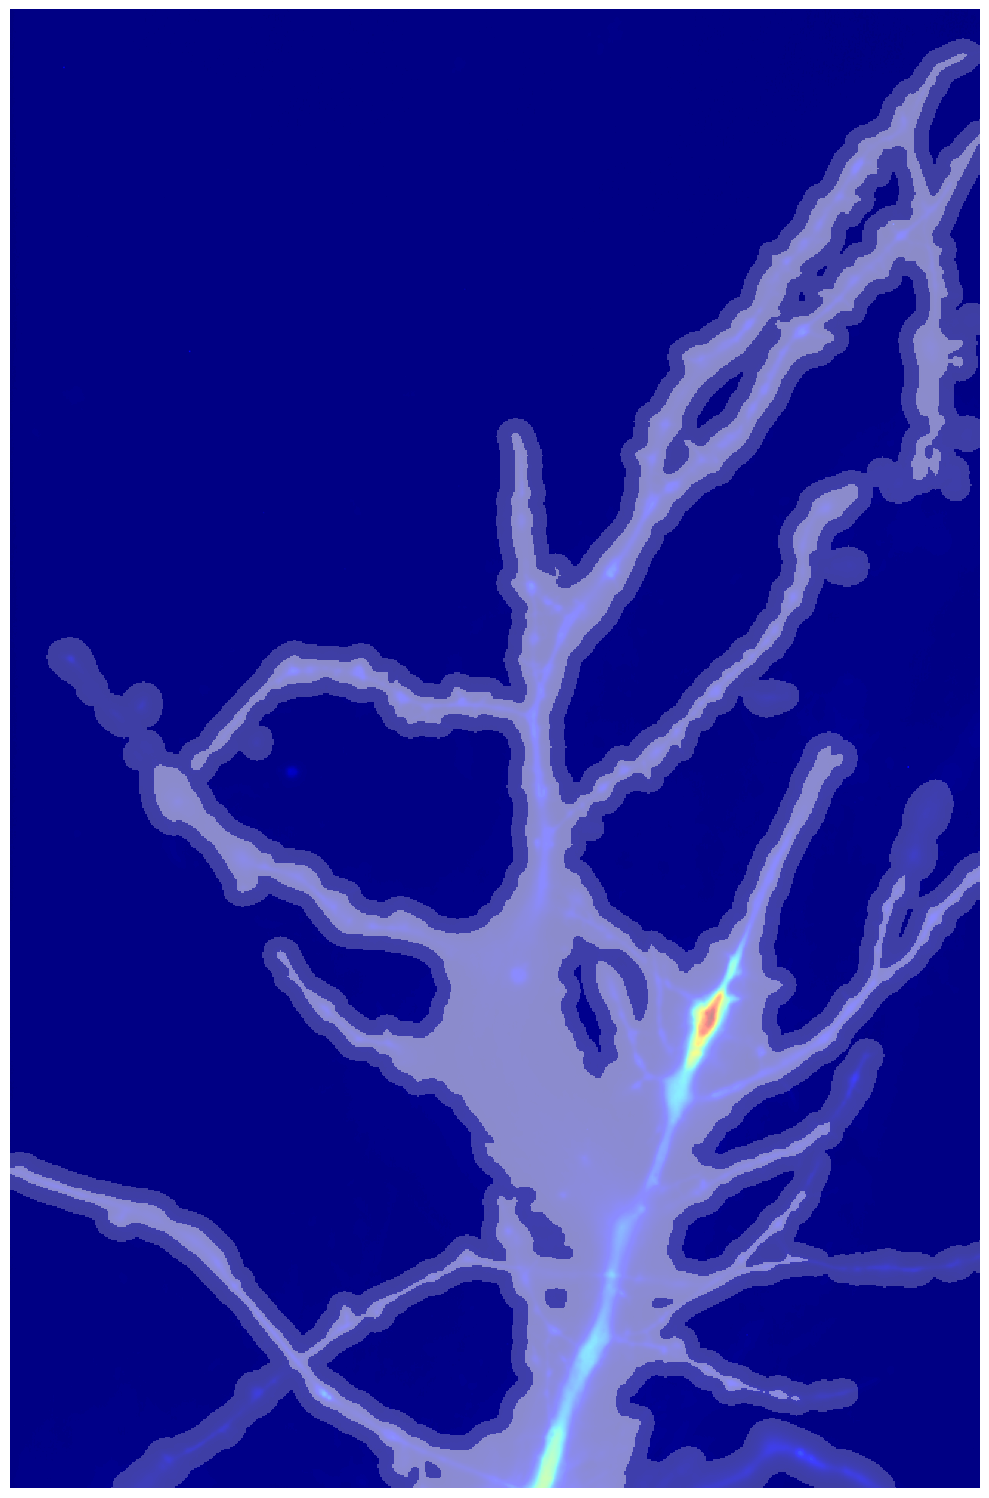

In [2]:
reg_path = 'data/wt_vs_mut/23_10_27_04.tif'
# reg_path = 'data/wt_vs_mut/23_06_23_11.tif'
reg_name = reg_path.split('/')[-1]
reg_name = reg_name.split('.')[0]


# fp1-CFP(1), fp2-YFP(3) or fp1-RFP(3), fp2-YFP(0)
reg = wf(img_path=reg_path, img_name=reg_name, ch_order={'fp1':3,'fp2':0}, wf_sigma=.75, border_crop=20,  # regtype parameters
         proc_sigma=1.5, win_size=801, k_val=1e-5, r_val=0.5,    # processes masking parameters
         soma_mask=False, soma_th=.5, soma_ext=100,
         proc_ext=10,
         select_largest_mask=True)

reg.ch_pic()
reg.processes_mask_pic()

## RG

In [ ]:
reg_RG = wt_vs_mut_multistim(wt_img=reg.corr_fp1_img,
                             mut_img=reg.corr_fp2_img,
                             narrow_proc_mask=reg.narrow_proc_mask,
                             proc_mask=reg.proc_mask,
                             sd_tolerance=2, base_frames=5, stim_list=[10, 30, 50], stim_win=3)  # up mask calc parameters

reg_RG.diff_img_pic()